## Importing Libraries

In [213]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory data analysis

In [214]:
# Loading data
sales_data = pd.read_csv('sales_data.csv')
outlet_data = pd.read_csv('outlets_data.csv')
product_data = pd.read_csv('product_data.csv')
week_data = pd.read_csv('week_data.csv')
freezer_data = pd.read_csv('freezer_data.csv')

In [215]:
outlet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Outlet_ID   988 non-null    object
 1   area(sqft)  988 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.6+ KB


In [216]:
# get the unique items in the "Outlet_ID" column
unique_items_count = outlet_data["Outlet_ID"].nunique()
print(unique_items_count)


951


This shows there are duplicated Outlets

to handle this issue data will be aggregate based on the Outlet ID and will take the average of the area (sqft) column

In [217]:
#aggregate the data based on the Outlet ID and take the average of the area (sqft) column
outlet_data = outlet_data.groupby('Outlet_ID', as_index=False)['area(sqft)'].mean()


In [218]:
#Join the datasets
sales_data = pd.merge(sales_data, outlet_data, on='Outlet_ID')
product_subset = product_data[['pid', 'volume','price']]
sales_data = pd.merge(sales_data, product_subset, on='pid')
sales_data = pd.merge(sales_data, week_data, on='week')


In [219]:
# Exploring data
print(sales_data.head())
print(outlet_data.head())
print(product_data.head())
print(week_data.head())
print(freezer_data.head())

  Outlet_ID  week  pid       product_name  no_units  area(sqft)  volume  \
0    ID7203     1  IP1  Vanilla Mini Cone     874.0      5660.0     0.2   
1    ID1878     1  IP1  Vanilla Mini Cone     918.0      4138.0     0.2   
2    ID1740     1  IP1  Vanilla Mini Cone     188.0      5546.0     0.2   
3    ID4366     1  IP1  Vanilla Mini Cone     117.0      5134.0     0.2   
4    ID4722     1  IP1  Vanilla Mini Cone     327.0      5593.0     0.2   

   price Start Date  End Date  
0    100   1/2/2023  1/8/2023  
1    100   1/2/2023  1/8/2023  
2    100   1/2/2023  1/8/2023  
3    100   1/2/2023  1/8/2023  
4    100   1/2/2023  1/8/2023  
  Outlet_ID  area(sqft)
0    ID1008      3387.0
1    ID1012      1931.0
2    ID1024      3127.0
3    ID1029      5294.0
4    ID1036      2584.0
   pid  volume              product_name  price
0  IP1     0.2         Vanilla Mini Cone    100
1  IP2     0.2      Chocolate Petite Bar     90
2  IP3     0.2       Strawberry Tiny Cup    110
3  IP4     0.2       

In [220]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81000 entries, 0 to 80999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Outlet_ID     81000 non-null  object 
 1   week          81000 non-null  int64  
 2   pid           81000 non-null  object 
 3   product_name  81000 non-null  object 
 4   no_units      81000 non-null  float64
 5   area(sqft)    81000 non-null  float64
 6   volume        81000 non-null  float64
 7   price         81000 non-null  int64  
 8   Start Date    81000 non-null  object 
 9   End Date      81000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 6.8+ MB
None


In [221]:
duplicates = sales_data.duplicated().sum()
print("Duplicate rows = ", duplicates)

Duplicate rows =  10


In [222]:
# Sales Data EDA and Visualization
# Summary statistics
print(sales_data.head())


  Outlet_ID  week  pid       product_name  no_units  area(sqft)  volume  \
0    ID7203     1  IP1  Vanilla Mini Cone     874.0      5660.0     0.2   
1    ID1878     1  IP1  Vanilla Mini Cone     918.0      4138.0     0.2   
2    ID1740     1  IP1  Vanilla Mini Cone     188.0      5546.0     0.2   
3    ID4366     1  IP1  Vanilla Mini Cone     117.0      5134.0     0.2   
4    ID4722     1  IP1  Vanilla Mini Cone     327.0      5593.0     0.2   

   price Start Date  End Date  
0    100   1/2/2023  1/8/2023  
1    100   1/2/2023  1/8/2023  
2    100   1/2/2023  1/8/2023  
3    100   1/2/2023  1/8/2023  
4    100   1/2/2023  1/8/2023  


In [223]:
print(sales_data.describe())

               week      no_units    area(sqft)        volume         price
count  81000.000000  81000.000000  81000.000000  81000.000000  81000.000000
mean       6.504432    373.143543   4456.357907      0.600711    605.927778
std        3.453426    370.546966   2435.984613      0.400002    507.211877
min        1.000000     20.000000    123.000000      0.200000     90.000000
25%        4.000000     79.000000   2607.000000      0.200000    100.000000
50%        7.000000    210.000000   4057.000000      1.000000   1000.000000
75%       10.000000    593.000000   6157.000000      1.000000   1100.000000
max       12.000000   1499.000000   9950.000000      1.000000   1200.000000


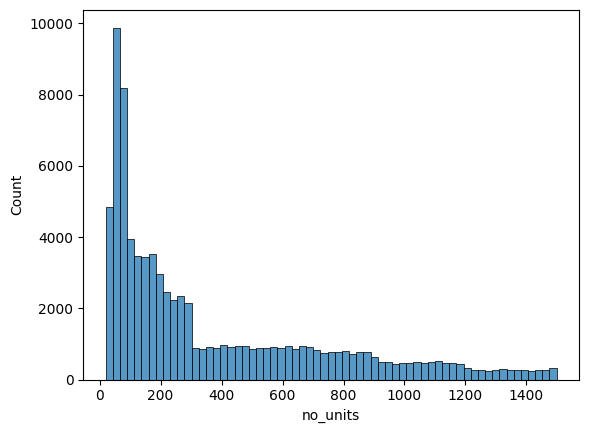

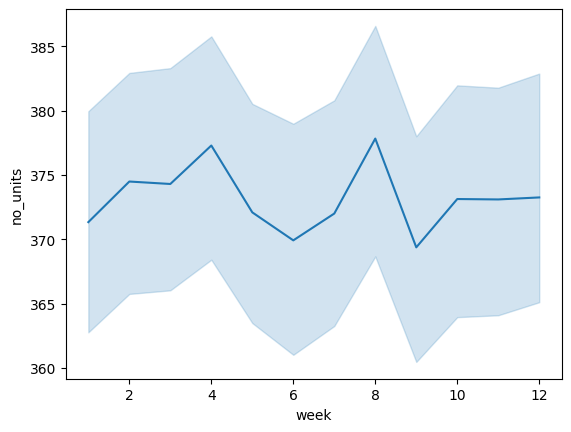

In [230]:
# Distribution plot of no_units
sns.histplot(sales_data['no_units'])
plt.show()

# Distribution plot of no_units
# sns.histplot(sales_data['area(sqft)'])
plt.show()

# Line plot of no_units over time
sns.lineplot(x='week', y='no_units', data=sales_data)
plt.show()

In [225]:
duplicates = sales_data.duplicated().sum()
print("Duplicate rows = ", duplicates)
sales_data.info()

Duplicate rows =  10
<class 'pandas.core.frame.DataFrame'>
Int64Index: 81000 entries, 0 to 80999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Outlet_ID     81000 non-null  object 
 1   week          81000 non-null  int64  
 2   pid           81000 non-null  object 
 3   product_name  81000 non-null  object 
 4   no_units      81000 non-null  float64
 5   area(sqft)    81000 non-null  float64
 6   volume        81000 non-null  float64
 7   price         81000 non-null  int64  
 8   Start Date    81000 non-null  object 
 9   End Date      81000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 6.8+ MB


In [226]:
# Check if there is missing values
missing = sales_data.isnull().sum()
print(missing)


Outlet_ID       0
week            0
pid             0
product_name    0
no_units        0
area(sqft)      0
volume          0
price           0
Start Date      0
End Date        0
dtype: int64


In [227]:
# Drop the duplicate rows
sales_data.drop_duplicates(inplace=True)
duplicates = sales_data.duplicated().sum()
print("Duplicate rows = ", duplicates)
sales_data.info()

Duplicate rows =  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80990 entries, 0 to 80999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Outlet_ID     80990 non-null  object 
 1   week          80990 non-null  int64  
 2   pid           80990 non-null  object 
 3   product_name  80990 non-null  object 
 4   no_units      80990 non-null  float64
 5   area(sqft)    80990 non-null  float64
 6   volume        80990 non-null  float64
 7   price         80990 non-null  int64  
 8   Start Date    80990 non-null  object 
 9   End Date      80990 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 6.8+ MB


In [228]:
sales_data.to_csv('Merged-data.csv', index=False)

## feature engineering

In [231]:
# Loading data
merged_df = pd.read_csv('Merged-data.csv')

In [233]:
# Convert the Start Date and End Date columns to datetime objects
merged_df["Start Date"] = pd.to_datetime(merged_df["Start Date"])
merged_df["End Date"] = pd.to_datetime(merged_df["End Date"])
# extract the month information
merged_df['Month'] = merged_df['End Date'].dt.month


In [235]:
print(merged_df.head())

  Outlet_ID  week  pid       product_name  no_units  area(sqft)  volume  \
0    ID7203     1  IP1  Vanilla Mini Cone     874.0      5660.0     0.2   
1    ID1878     1  IP1  Vanilla Mini Cone     918.0      4138.0     0.2   
2    ID1740     1  IP1  Vanilla Mini Cone     188.0      5546.0     0.2   
3    ID4366     1  IP1  Vanilla Mini Cone     117.0      5134.0     0.2   
4    ID4722     1  IP1  Vanilla Mini Cone     327.0      5593.0     0.2   

   price Start Date   End Date  Month  
0    100 2023-01-02 2023-01-08      1  
1    100 2023-01-02 2023-01-08      1  
2    100 2023-01-02 2023-01-08      1  
3    100 2023-01-02 2023-01-08      1  
4    100 2023-01-02 2023-01-08      1  


In [236]:
#creating total sales column
merged_df['total_sales'] = merged_df['no_units'] * merged_df['price']


In [237]:
#extracking product type from pid
merged_df['product_type'] = merged_df['pid'].str[:2]


In [238]:
print(merged_df.head())

  Outlet_ID  week  pid       product_name  no_units  area(sqft)  volume  \
0    ID7203     1  IP1  Vanilla Mini Cone     874.0      5660.0     0.2   
1    ID1878     1  IP1  Vanilla Mini Cone     918.0      4138.0     0.2   
2    ID1740     1  IP1  Vanilla Mini Cone     188.0      5546.0     0.2   
3    ID4366     1  IP1  Vanilla Mini Cone     117.0      5134.0     0.2   
4    ID4722     1  IP1  Vanilla Mini Cone     327.0      5593.0     0.2   

   price Start Date   End Date  Month  total_sales product_type  
0    100 2023-01-02 2023-01-08      1      87400.0           IP  
1    100 2023-01-02 2023-01-08      1      91800.0           IP  
2    100 2023-01-02 2023-01-08      1      18800.0           IP  
3    100 2023-01-02 2023-01-08      1      11700.0           IP  
4    100 2023-01-02 2023-01-08      1      32700.0           IP  
